# Sentiment Analysis on Amazon Product Reviews

## 1. Dataset Overview
- **Dataset Description**:
  - Analyze an Amazon product review dataset containing textual reviews (`reviewText`) and corresponding sentiment labels (`Positive`).
  - Sentiment is binary: 1 for positive, 0 for negative.
- **Objective**:
  - Predict the sentiment of a product review based on its textual content.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/refs/heads/main/amazon.csv'
df_text = pd.read_csv(url)
df_text.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [4]:
df_text.rename(columns={'reviewText': 'text', 'Positive' : 'review'}, inplace= True)

In [5]:
df = df_text.copy()
df1 = df_text.copy()

In [6]:
df['review'].value_counts()

review
1    15233
0     4767
Name: count, dtype: int64

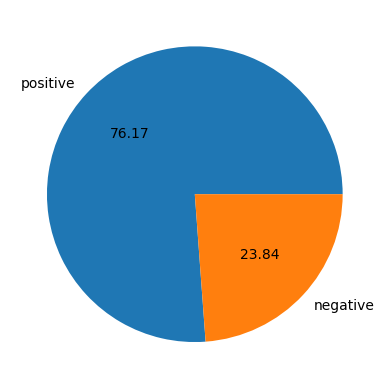

In [7]:
plt.pie(df['review'].value_counts(), labels = ['positive','negative'] , autopct ="%0.2f" )
plt.show()

In [8]:
#data is imbalanced

In [9]:
df['num_characters'] = df['text'].apply(len)

In [10]:
df.head()

,text,review,num_characters
0,This is a one of the best apps acording to a b...,1,129
1,This is a pretty good version of the game for ...,1,129
2,this is a really cool game. there are a bunch ...,1,96
3,"This is a silly game and can be frustrating, b...",1,105
4,This is a terrific game on any pad. Hrs of fun...,1,117


In [11]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /Users/shadi/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [13]:
df.head()

,text,review,num_characters,num_words
0,This is a one of the best apps acording to a b...,1,129,28
1,This is a pretty good version of the game for ...,1,129,30
2,this is a really cool game. there are a bunch ...,1,96,23
3,"This is a silly game and can be frustrating, b...",1,105,23
4,This is a terrific game on any pad. Hrs of fun...,1,117,25


In [14]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [15]:
df.head()

,text,review,num_characters,num_words,num_sentences
0,This is a one of the best apps acording to a b...,1,129,28,1
1,This is a pretty good version of the game for ...,1,129,30,3
2,this is a really cool game. there are a bunch ...,1,96,23,3
3,"This is a silly game and can be frustrating, b...",1,105,23,1
4,This is a terrific game on any pad. Hrs of fun...,1,117,25,4


In [16]:
df[['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,20000.000000,20000.000000,20000.000000
mean,175.793850,2.948200,39.011350
std,58.966619,1.411424,12.895563
min,3.000000,1.000000,1.000000
25%,123.000000,2.000000,27.000000
50%,164.000000,3.000000,37.000000
75%,254.000000,4.000000,51.000000
max,254.000000,37.000000,123.000000


In [16]:
#describe for negative review
df[df['review'] == 0][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,4767.000000,4767.000000,4767.000000
mean,172.288651,2.880008,38.697294
std,58.059921,1.431567,12.780682
min,4.000000,1.000000,1.000000
25%,121.000000,2.000000,28.000000
50%,159.000000,3.000000,36.000000
75%,239.000000,4.000000,50.000000
max,254.000000,20.000000,123.000000


In [17]:
#describe for positive review
df[df['review'] == 1][['num_characters','num_sentences','num_words']].describe()

,num_characters,num_sentences,num_words
count,15233.000000,15233.000000,15233.000000
mean,176.890763,2.969540,39.109630
std,59.206778,1.404428,12.930154
min,3.000000,1.000000,1.000000
25%,123.000000,2.000000,27.000000
50%,165.000000,3.000000,37.000000
75%,254.000000,4.000000,52.000000
max,254.000000,37.000000,110.000000


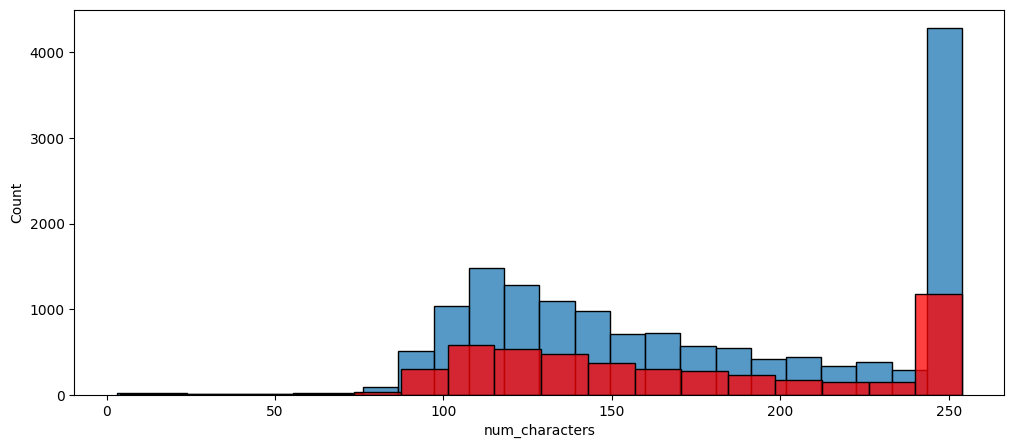

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['review'] == 1]['num_characters'])
sns.histplot(df[df['review'] == 0]['num_characters'], color='red')
plt.show()

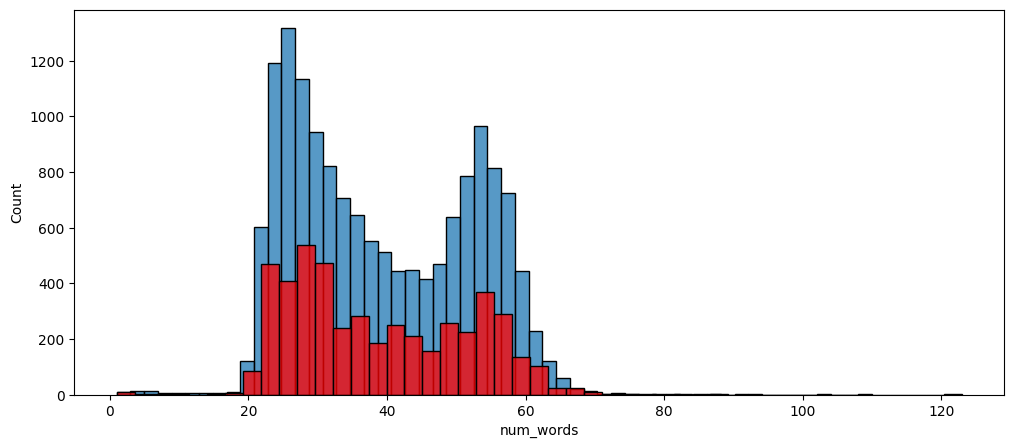

In [19]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['review'] == 1]['num_words'])
sns.histplot(df[df['review'] == 0]['num_words'], color='red')
plt.show()

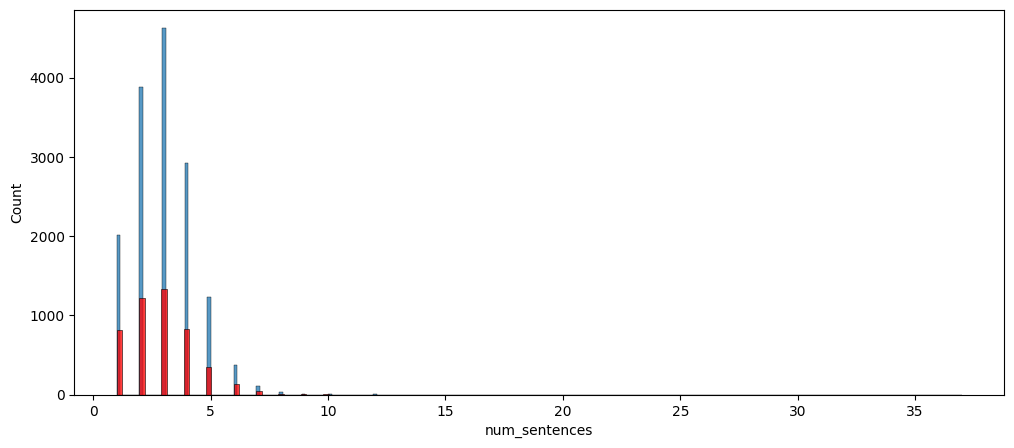

In [20]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['review'] == 1]['num_sentences'])
sns.histplot(df[df['review'] == 0]['num_sentences'], color='red')
plt.show()

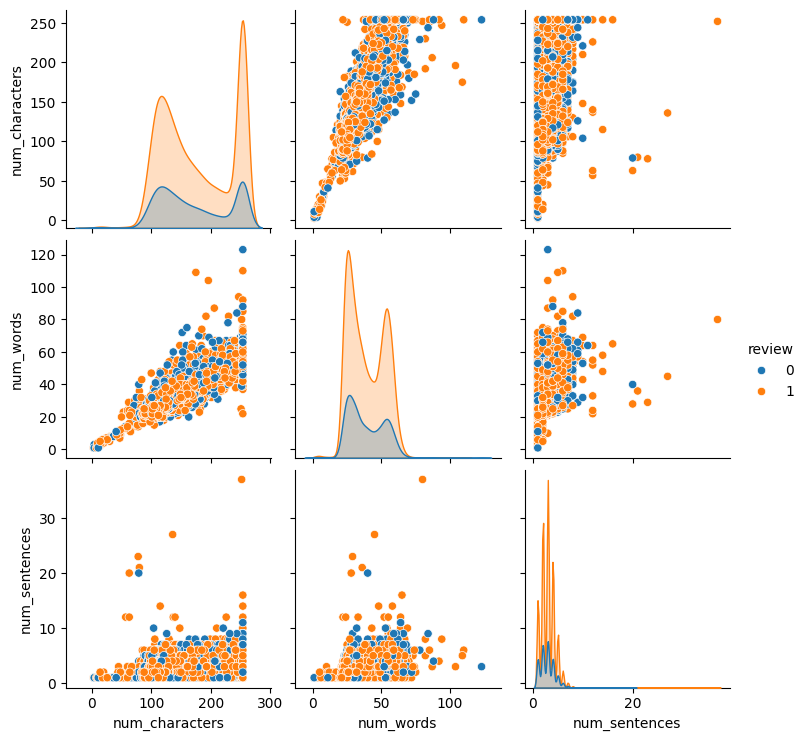

In [21]:
sns.pairplot(df, hue = 'review')
plt.show()

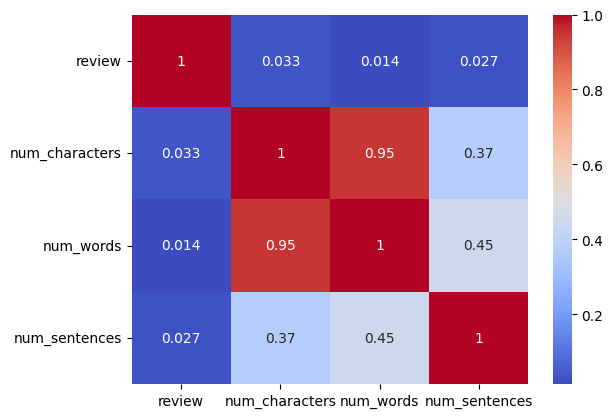

In [17]:
sns.heatmap(df[['review','num_characters',	'num_words',	'num_sentences']].corr(), annot = True, cmap = 'coolwarm')
plt.show()

## 2. Data Preprocessing
- Handle missing values, if any.
- Perform text preprocessing on the `reviewText` column:
  - Convert text to lowercase.
  - Remove stop words, punctuation, and special characters.
  - Tokenize and lemmatize text data.
- Split the dataset into training and testing sets.


In [23]:
df.isnull().sum()

text              0
review            0
num_characters    0
num_words         0
num_sentences     0
dtype: int64

In [24]:
df.duplicated().sum()

np.int64(0)

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/shadi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
stopword = set(stopwords.words('english')) - {'not', 'no', 'nor', 'never', 'but', 'very'}

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
def transform_text(text):
  text = text.lower() # make lower
  text = nltk.word_tokenize(text) # word tokenize
  y = []
  for i in text:
    if i.isalnum(): #alphanumeric character
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopword and i not in string.punctuation: #remove stopword and punctuations
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i)) #stemming

  return " ".join(y)

In [29]:
df['transform_text'] = df['text'].apply(transform_text)

In [30]:
df.head()

,text,review,num_characters,num_words,num_sentences,transform_text
0,This is a one of the best apps acording to a b...,1,129,28,1,one best app acord bunch peopl agre bomb egg p...
1,This is a pretty good version of the game for ...,1,129,30,3,pretti good version game free lot differ level...
2,this is a really cool game. there are a bunch ...,1,96,23,3,realli cool game bunch level find golden egg s...
3,"This is a silly game and can be frustrating, b...",1,105,23,1,silli game frustrat but lot fun definit recomm...
4,This is a terrific game on any pad. Hrs of fun...,1,117,25,4,terrif game pad hr fun grandkid love great ent...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width = 800, height = 400, min_font_size = 10, background_color = 'white')
postive_wc = wc.generate(df[df['review'] == 1]['transform_text'].str.cat(sep = ' '))

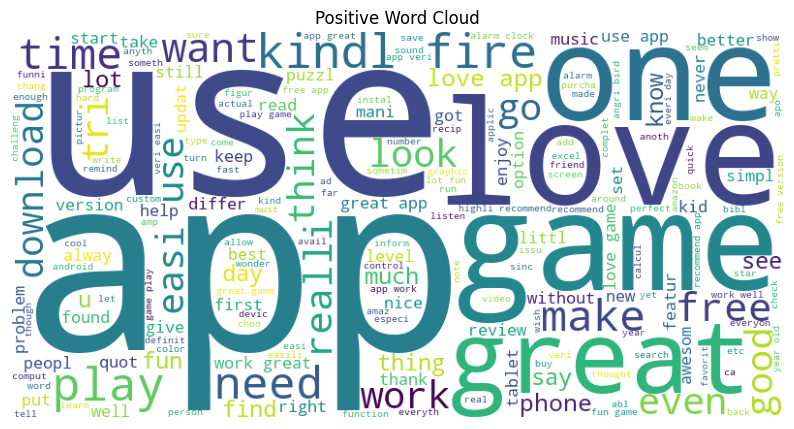

In [36]:
plt.figure(figsize = (10,8))
plt.imshow(postive_wc)
plt.axis('off')
plt.title("Positive Word Cloud")
plt.show()

In [37]:
negative_wc = wc.generate(df[df['review'] == 0]['transform_text'].str.cat(sep = ' '))

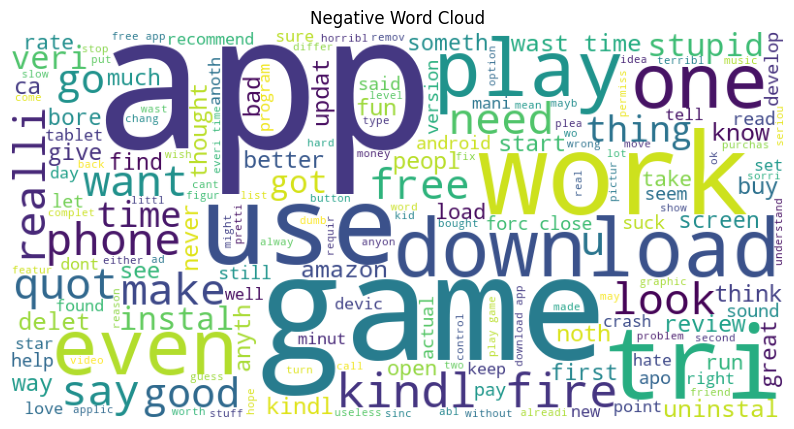

In [38]:
plt.figure(figsize = (10,8))
plt.imshow(negative_wc)
plt.axis('off')
plt.title("Negative Word Cloud")
plt.show()

In [39]:
positive_words = []
for review in df[df['review'] == 1]['transform_text'].tolist():
  for word in review.split():
    positive_words.append(word)

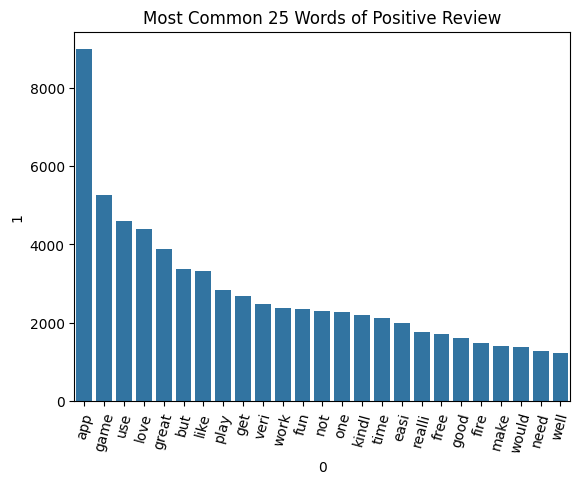

In [40]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(positive_words).most_common(25))[0], y = pd.DataFrame(Counter(positive_words).most_common(25))[1])
plt.xticks(rotation = 75)
plt.title("Most Common 25 Words of Positive Review")
plt.show()

In [41]:
negative_words = []
for review in df[df['review'] == 0]['transform_text'].tolist():
  for word in review.split():
    negative_words.append(word)

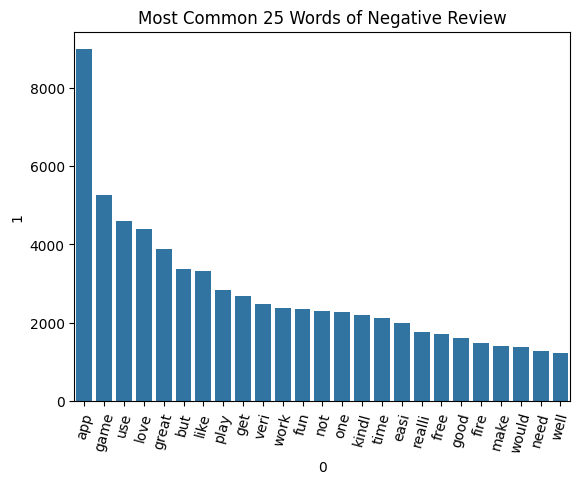

In [42]:
sns.barplot(x = pd.DataFrame(Counter(positive_words).most_common(25))[0], y = pd.DataFrame(Counter(positive_words).most_common(25))[1])
plt.xticks(rotation = 75)
plt.title("Most Common 25 Words of Negative Review")
plt.show()

### Data Preprocessign for LSTM

In [43]:
df1.head()

,text,review
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [44]:
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r'http\S+|https\S+|www\S+', '', text) #remove if there any link
    text = re.sub(r'@\w+','',text)  #remove if there any @mensioned
    text = re.sub(r'[^a-zA-Z\s]', '', text)   #remove all without a-z and space
    text = re.sub(r'\s+', ' ', text).strip() #remove more than one space and turn it in one space and remove 1st and last of the santence's sapce
    return text

In [48]:
df1['text'] = df['text'].apply(clean_text)

In [49]:
df1.head()

,text,review
0,this is a one of the best apps acording to a b...,1
1,this is a pretty good version of the game for ...,1
2,this is a really cool game there are a bunch o...,1
3,this is a silly game and can be frustrating bu...,1
4,this is a terrific game on any pad hrs of fun ...,1


In [50]:
X1 = df['text'] # separate the input and target column
y1 = df['review']

In [51]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size= .2, random_state=42) ## split them into train(80%) and test(20%) data,
                                                                            # take random_state to insure the suffle data remain same

In [52]:
tokenizer = Tokenizer(num_words=5000, oov_token= '<OOV>') # convert word into token

In [53]:
tokenizer.fit_on_texts(X_train1) # fit on train data

In [54]:
X_train_seq = tokenizer.texts_to_sequences(X_train1) # transform in train and test data
X_test_seq = tokenizer.texts_to_sequences(X_test1)

In [55]:
max_len = int(np.quantile([len(seq) for seq in X_train_seq],0.95)) # find the max_lenght of the data
                                                                # here we take 95 percentile data as max length

In [56]:
max_len

52

In [57]:
X_train_pad = pad_sequences(X_train_seq, maxlen= max_len, padding='post') #  post padding the tokenize data as max length
X_test_pad = pad_sequences(X_test_seq, maxlen= max_len, padding = 'post')

## 3. Model Selection
- Choose at least three machine learning models for sentiment classification:
  - Statistical Models:
    - Logistic Regression
    - Random Forest
    - Support Vector Machine (SVM)
    - Naïve Bayes
    - Gradient Boosting (e.g., XGBoost, AdaBoost, CatBoost)
  - Neural Models:
    - LSTM (Long Short-Term Memory)
    - GRUs (Gated Recurrent Units)


### Separate X and y

In [75]:
X = df['text']

In [76]:
y = df['review']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state= 42)

### Pipeline for all model

In [78]:
mnb_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
    ('classifier', MultinomialNB())
]
)

In [110]:
bnb_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
    ('classifier', BernoulliNB())
]
)

In [81]:
svc_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
    ('classifier', SVC())
]
)

In [82]:
rfc_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
    ('classifier', RandomForestClassifier())
]
)

In [83]:
abc_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
    ('classifier', AdaBoostClassifier())
]
)

In [84]:
gbc_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
    ('classifier', GradientBoostingClassifier())
]
)

In [85]:
lr_model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),  # use tfidf to make text into numerical feature vectors
    ('classifier', LogisticRegression())
]
)

In [86]:
clfs = {
    'SVC' : svc_model,
    'NB': bnb_model,
    'LR': lr_model,
    'RF': rfc_model,
    'AdaBoost': abc_model,
    'GBDT':gbc_model
}

### LSTM

In [87]:
model = Sequential()

 # each input sequence has a fixed shape 29 which is the max_len
model.add(Input(shape = (max_len,)))

# we take 5000 most frequent words into 50 dimensional dense vector
model.add(Embedding(5000, 50))
# LSTM layer to capture sequential and contextual information
model.add(LSTM(16))

# Dropout layer to reduce overfitting by randomly taking off neurons during training
model.add(Dropout(.5))

# Output layer with sigmoid activation for binary sentiment classification
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 52, 50)         │       250,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 16)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 254,305 (993.38 KB)

 Trainable params: 254,305 (993.38 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Model Training
- Train each selected model on the training dataset.
- Utilize vectorization techniques for text data:
  - TF-IDF (Term Frequency-Inverse Document Frequency)
  - Word embeddings (e.g., Word2Vec, GloVe)


### Model Train
- Multinomial Naive Bayes
- BernoulliNB
- GaussianNB
- Logistic Regression
- Random Forest
- Support Vector Classifier
- Gradient Boosting Classifier
- AdaBoost Classifier

In [89]:
print(X_train.shape)
print(y_train.shape)

(16000,)
(16000,)


In [90]:
mnb_model.fit(X_train, y_train)
y_pred = mnb_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("Precision Score: ",precision_score(y_test,y_pred))
print("Recall Score: ", recall_score(y_test,y_pred))

Accuracy Score:  0.89875
Confusion Matrix:  [[ 637  321]
 [  84 2958]]
Precision Score:  0.9021043000914913
Recall Score:  0.9723865877712031


In [111]:
bnb_model.fit(X_train, y_train) #high precision, to detect most of the negative review
y_pred2 = bnb_model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred2))
print("Precision Score: ",precision_score(y_test,y_pred2))
print("Recall Score: ", recall_score(y_test,y_pred2))

Accuracy Score:  0.899
Confusion Matrix:  [[ 845  113]
 [ 291 2751]]
Precision Score:  0.9605446927374302
Recall Score:  0.9043392504930966


In [94]:
def classifier_model(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  return accuracy, precision, recall

In [95]:
accuracy_scores = []
precision_scores = []
recall_scores = []
for model_name, clf in clfs.items():
  current_accuracy, current_precision, current_recall = classifier_model(clf, X_train, y_train, X_test, y_test)
  print("For", model_name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)
  print("Recall - ", current_recall)
  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)

For SVC
Accuracy -  0.908
Precision -  0.9175515302935665
Recall -  0.9658119658119658
For NB
Accuracy -  0.899
Precision -  0.9605446927374302
Recall -  0.9043392504930966
For LR
Accuracy -  0.90325
Precision -  0.909848718740352
Recall -  0.9687705456936226
For RF
Accuracy -  0.88375
Precision -  0.8872858431018936
Recall -  0.9704142011834319
For AdaBoost
Accuracy -  0.81275
Precision -  0.8267312624679396
Recall -  0.9536489151873767
For GBDT
Accuracy -  0.858
Precision -  0.8581354950781702
Recall -  0.9743589743589743


### LSTM model train

In [96]:
early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience= 2,
    restore_best_weights= True
)

In [97]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics= ['accuracy'])

In [98]:
history = model.fit(X_train_pad, y_train, epochs= 10, batch_size=32, validation_data=(X_test_pad, y_test), callbacks=[early_stop])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7603 - loss: 0.5655 - val_accuracy: 0.7605 - val_loss: 0.5508
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7853 - loss: 0.4764 - val_accuracy: 0.8533 - val_loss: 0.3566
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8014 - loss: 0.5148 - val_accuracy: 0.8257 - val_loss: 0.4586
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8296 - loss: 0.4686 - val_accuracy: 0.8307 - val_loss: 0.4532


## 5. Formal Evaluation
- Evaluate the performance of each model on the testing set using the following metrics:
  - Accuracy
  - Precision
  - Recall
  - F1 Score
  - Confusion Matrix


In [99]:
performance_df = pd.DataFrame({"Model": list(clfs.keys()),
                               "Accuracy": accuracy_scores,
                               "Precision": precision_scores,
                               "Recall": recall_scores}).sort_values("Precision", ascending=False)

In [100]:
performance_df

,Model,Accuracy,Precision,Recall
1,NB,0.89900,0.960545,0.904339
0,SVC,0.90800,0.917552,0.965812
2,LR,0.90325,0.909849,0.968771
3,RF,0.88375,0.887286,0.970414
5,GBDT,0.85800,0.858135,0.974359
4,AdaBoost,0.81275,0.826731,0.953649


### Score for LSTM

In [112]:
y_pred_prob = model.predict(X_test_pad)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step   


In [113]:
y_pred = (y_pred_prob > 0.5).astype("int32").reshape(-1)

In [114]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.85325
Precision: 0.924006908462867
Recall: 0.8793556870479947
F1 Score: 0.9011285160855651
Confusion Matrix:
 [[ 738  220]
 [ 367 2675]]


## 6. Hyperparameter Tuning
- Perform hyperparameter tuning for selected models using:
  - Grid Search
  - Random Search
- Explain the chosen hyperparameters and justify their selection.


In [101]:
model_params = {
    'sv_classifier': {
        'model': SVC(class_weight='balanced', random_state=42),
        'params': {
            'tfidf__max_features': [5000],
            'tfidf__ngram_range': [(1, 2)],
            'clf__C': [0.1, 1.0]
        }
    },
    'log_reg': {
        'model': LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'),
        'params': {
            'tfidf__max_features': [5000],
            'tfidf__ngram_range': [(1, 2)],
            'clf__penalty': ['l2'],
            'clf__C': [1, 10]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(n_jobs=-1),
        'params': {
            'tfidf__max_features': [5000],
            'clf__n_estimators': [100],
            'clf__max_depth': [None, 10]
        }
    },
    'bernoulli_nb': {
        'model': BernoulliNB(),
        'params': {
            'tfidf__max_features': [5000],
            'clf__alpha': [0.1, 1.0],
            'clf__binarize': [0.0, 0.1]
        }
    },
    'adaboost': {
        'model': AdaBoostClassifier(algorithm='SAMME'),
        'params': {
            'tfidf__max_features': [5000],
            'clf__n_estimators': [50, 100],
            'clf__learning_rate': [0.1, 1.0]
        }
    },
    'grad_boost': {
        'model': GradientBoostingClassifier(),
        'params': {
            'tfidf__max_features': [5000],
            'clf__n_estimators': [100],
            'clf__learning_rate': [0.1]
        }
    }
}
print(model_params)

{'sv_classifier': {'model': SVC(class_weight='balanced', random_state=42), 'params': {'tfidf__max_features': [5000], 'tfidf__ngram_range': [(1, 2)], 'clf__C': [0.1, 1.0]}}, 'log_reg': {'model': LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear'), 'params': {'tfidf__max_features': [5000], 'tfidf__ngram_range': [(1, 2)], 'clf__penalty': ['l2'], 'clf__C': [1, 10]}}, 'random_forest': {'model': RandomForestClassifier(n_jobs=-1), 'params': {'tfidf__max_features': [5000], 'clf__n_estimators': [100], 'clf__max_depth': [None, 10]}}, 'bernoulli_nb': {'model': BernoulliNB(), 'params': {'tfidf__max_features': [5000], 'clf__alpha': [0.1, 1.0], 'clf__binarize': [0.0, 0.1]}}, 'adaboost': {'model': AdaBoostClassifier(algorithm='SAMME'), 'params': {'tfidf__max_features': [5000], 'clf__n_estimators': [50, 100], 'clf__learning_rate': [0.1, 1.0]}}, 'grad_boost': {'model': GradientBoostingClassifier(), 'params': {'tfidf__max_features': [5000], 'clf__n_estimators': [100], 'clf__le

#### Grid Search CV

In [102]:
score = []
for model_name, mp in model_params.items():
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(max_features = 5000, ngram_range =(1,2))),
        ('clf', mp['model'])
    ])
    clf = GridSearchCV(pipe, mp['params'], cv= 5, return_train_score= False)
    clf.fit(X_train, y_train)

    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df2 = pd.DataFrame(score, columns =['model','best_score','best_params'])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519

In [105]:
df2

,model,best_score,best_params
0,sv_classifier,0.914000,"{'clf__C': 1.0, 'tfidf__max_features': 5000, '..."
1,log_reg,0.903625,"{'clf__C': 10, 'clf__penalty': 'l2', 'tfidf__m..."
2,random_forest,0.880625,"{'clf__max_depth': None, 'clf__n_estimators': ..."
3,bernoulli_nb,0.904375,"{'clf__alpha': 0.1, 'clf__binarize': 0.0, 'tfi..."
4,adaboost,0.817500,"{'clf__learning_rate': 1.0, 'clf__n_estimators..."
5,grad_boost,0.856500,"{'clf__learning_rate': 0.1, 'clf__n_estimators..."


In [106]:
df2['best_params'][3]

{'clf__alpha': 0.1, 'clf__binarize': 0.0, 'tfidf__max_features': 5000}

#### Randomized Search CV

In [103]:
score = []
for model_name, mp in model_params.items():
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', mp['model'])
    ])
    clf = RandomizedSearchCV(pipe, mp['params'], cv= 5,n_iter = 10, return_train_score= False)
    clf.fit(X_train, y_train)

    score.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
df3 = pd.DataFrame(score, columns =['model','best_score','best_params'])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/e

In [104]:
df3

,model,best_score,best_params
0,sv_classifier,0.914000,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea..."
1,log_reg,0.903625,"{'tfidf__ngram_range': (1, 2), 'tfidf__max_fea..."
2,random_forest,0.863375,"{'tfidf__max_features': 5000, 'clf__n_estimato..."
3,bernoulli_nb,0.896312,"{'tfidf__max_features': 5000, 'clf__binarize':..."
4,adaboost,0.818250,"{'tfidf__max_features': 5000, 'clf__n_estimato..."
5,grad_boost,0.853250,"{'tfidf__max_features': 5000, 'clf__n_estimato..."


### Hyperparameter Tuning

Hyperparameter tuning was used for selected machine learning models to optimize their performance.
`Grid Search` and `Randomized Search` both are use to find the best model

### Grid Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Grid Search exhaustively evaluates all combinations of predefined hyperparameters. This ensures that the best combination is found, but can be computationally expensive for large parameter spaces.

- #### Support Vector Classifier
- tfidf__max_features: → [5000] Limit number of features from TF-IDF vectrization.
- tfidf__ngram_range: → [(1, 2)] Includes unigrams and biggrams for better contextual understanding.
- clf__C: [0.1, 1.0] → Regularization strength for control the marginal softness.

- #### Logistic Regression (LR)
- tfidf__max_features: → [5000] Limit number of features from TF-IDF vectrization.
- tfidf__ngram_range: → [(1, 2)] Includes unigrams and biggrams for better contextual understanding.
- clf__penalty: ['l2'] → Standard L2 regularization for stability.
- clf__C: [1, 10] → Higher C value mean less Regularization.

- #### Random Forest (RF)
- n_estimators: [100] → Number of decision trees in the ensemble model.
- max_depth: [None, 10] → Depth of each tree, to control overfitting.

- #### Bernoulli Naive Bayes (BNB)
- alpha: [0.1, 1.0] → Laplace smoothing parameter.
- binarize: [0.0, 0.1] → Threshold to binarize feature counts.

- #### AdaBoost
- n_estimators: [50, 100] → Number of weak learners.
- learning_rate: [0.1, 1.0] → Weight applied to each weak learner.

- #### Gradient Boosting (GBDT)
- n_estimators: [100] → Number of boosting stages.
- learning_rate: [0.1] → Shrinks contribution of each tree to reduce overfitting.

### Randomized Search
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

Randomized Search samples a fixed number of parameter combinations from the predefined grid. This is faster than Grid Search for large hyperparameter spaces and can often find near-optimal parameters.

## Justification of Hyperparameters

 ##### `Regularization parameters` (C, alpha): Control overfitting by penalizing large weights.
 ##### `Number of estimators / depth` (n_estimators, max_depth): Trade-off between model complexity and generalization.
##### `TF-IDF parameters` (max_features, ngram_range): Balances capturing relevant features versus keeping computational cost manageable.
##### `Learning rate (AdaBoost/GBDT)`: Determines how much each weak learner contributes; smaller values reduce overfitting.

## 7. Comparative Analysis
- Compare the performance of all models based on evaluation metrics.
- Identify strengths and weaknesses of each model (e.g., speed, accuracy, interpretability).


#### Performance Comparison
All models were evaluated using `Accuracy`, `Precision`, `Recall`, `F1-score`, and `Confusion Matrix`. The comparison shows noticeable differences in performance and behavior across traditional machine learning models and the deep learning model `(LSTM)`.

`Multinomial Naive Bayes (MNB)`: performed well on text data due to its suitability for word frequency features such as TF-IDF. It achieved strong precision and recall with fast training time.

`Bernoulli Naive Bayes (BNB)`: worked reasonably well but slightly underperformed compared to MNB because it considers only binary word occurrence rather than frequency.

`LSTM` Perform well but not better than `Bernoulli Naive Bayes`. Precision and recall score is lower than BNB model


### Strengths and Weaknesses

#### Bernoulli Naive Bayes (BNB)
- Very fast training and prediction
- Good for binary feature representation
- Best performance

#### Multinomial Naive Bayes (MNB)
- Good in training and prediction
- Simple and interpretable
- Cannot capture context between words

#### LSTM (Long Short-Term Memory)
- Captures sequential and contextual information
- Handles long-term dependencies in text
- Slower training time
- Requires more computational resources

##### Traditional Naive Bayes models are efficient, fast, and suitable for baseline text classification tasks. Multinomial Naive Bayes is a strong choice. If maximum predictive performance is required.

## 8. Conclusion & Comments
- Summarize the findings of the project.
- Provide insights into the challenges faced during data preprocessing, model training, and evaluation.
- Highlight key lessons learned.
- Add clear and concise comments to the code for each step of the project.
- Highlight key results, visualizations, and model comparisons.


- The project evaluated multiple models for sentiment classification of Amazon reviews. Used model Multinomial Naive Bayes (MNB), Bernoulli Naive Bayes (BNB), Logistic Regression, Random Forest, Gradient Boosting, AdaBoost and LSTM.
- `Bernoulli Naive Bayes (BNB)` was chosen for the final app due to fast training, high precision, and suitability for binary TF-IDF features.
- Challenges included text cleaning, converting text to numerical features, hyperparameter tuning.
- Key lessons: proper preprocessing is critical, BNB is efficient and interpretable, deep learning (LSTM) captures context but requires more resources.
- Code was documented for reproducibility, covering data preprocessing, feature extraction, model training, tuning, evaluation, and app deployment.
- Visualizations and metrics confirmed BNB’s strong performance; the app leverages BNB for reliable sentiment predictions.

In [116]:
import pickle
pickle.dump(bnb_model,open('model.pkl','wb'))